In [307]:
import os
import glob
import re
import numpy as np
import pandas as pd
import scipy.sparse
from sklearn.cross_decomposition import PLSRegression
%matplotlib inline

In [122]:
X_train = scipy.sparse.load_npz("data/processed_descriptions/train_descriptions.npz")
X_test  = scipy.sparse.load_npz("data/processed_descriptions/test_descriptions.npz")

X_train_nouns = scipy.sparse.load_npz("data/processed_descriptions/train_descriptions_nouns.npz")
X_test_nouns  = scipy.sparse.load_npz("data/processed_descriptions/test_descriptions_nouns.npz")

In [8]:
Y_train = scipy.sparse.load_npz("data/processed_tags/train_tag_nocat_tfdif.npz")
Y_test  = scipy.sparse.load_npz("data/processed_tags/test_tag_nocat_tfdif.npz")

In [9]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(10000, 7038) (2000, 7038) (10000, 92) (2000, 92)


In [338]:
resnet_fc1000_train = pd.read_csv("data/features_train/features_resnet1000_train.csv", header = None, index_col = 0)
resnet_train = pd.read_csv("data/features_train/features_resnet1000intermediate_train.csv", header = None, index_col = 0)

resnet_fc1000_test = pd.read_csv("data/features_test/features_resnet1000_test.csv", header = None, index_col = 0)
resnet_test = pd.read_csv("data/features_test/features_resnet1000intermediate_test.csv", header = None, index_col = 0)

print(resnet_fc1000_train.shape, resnet_fc1000_test.shape)
print(resnet_train.shape, resnet_test.shape)

(10000, 1000) (2000, 1000)
(10000, 2048) (2000, 2048)


In [339]:
tr_idx = resnet_train.index
print(tr_idx[0:10])
new_idx1 = [int(re.findall("\d+", idx)[0]) for idx in tr_idx]
print(new_idx1[0:10])
resnet_train = np.array(pd.DataFrame(np.array(resnet_train), index = new_idx1).sort_index())

te_idx = resnet_test.index
print(te_idx[0:10])
new_idx2 = [int(re.findall("\d+", idx)[0]) for idx in te_idx]
print(new_idx2[0:10])
resnet_test = np.array(pd.DataFrame(np.array(resnet_test), index = new_idx2).sort_index())

Index(['images_train/5373.jpg', 'images_train/984.jpg',
       'images_train/7127.jpg', 'images_train/5293.jpg',
       'images_train/3688.jpg', 'images_train/3340.jpg',
       'images_train/4787.jpg', 'images_train/5707.jpg',
       'images_train/1262.jpg', 'images_train/8355.jpg'],
      dtype='object', name=0)
[5373, 984, 7127, 5293, 3688, 3340, 4787, 5707, 1262, 8355]
Index(['images_test/152.jpg', 'images_test/901.jpg', 'images_test/1609.jpg',
       'images_test/501.jpg', 'images_test/517.jpg', 'images_test/1516.jpg',
       'images_test/1822.jpg', 'images_test/1993.jpg', 'images_test/405.jpg',
       'images_test/1718.jpg'],
      dtype='object', name=0)
[152, 901, 1609, 501, 517, 1516, 1822, 1993, 405, 1718]


In [340]:
fc_tr_idx = resnet_fc1000_train.index
print(fc_tr_idx[0:10])
fc_new_idx1 = [int(re.findall("\d+", idx)[0]) for idx in fc_tr_idx]
print(fc_new_idx1[0:10])
resnet_fc1000_train = np.array(pd.DataFrame(np.array(resnet_fc1000_train), index = fc_new_idx1).sort_index())

fc_te_idx = resnet_fc1000_test.index
print(fc_te_idx[0:10])
fc_new_idx2 = [int(re.findall("\d+", idx)[0]) for idx in fc_te_idx]
print(fc_new_idx2[0:10])
resnet_fc1000_test = np.array(pd.DataFrame(np.array(resnet_fc1000_test), index = fc_new_idx2).sort_index())

Index(['images_train/5373.jpg', 'images_train/984.jpg',
       'images_train/7127.jpg', 'images_train/9609.jpg',
       'images_train/5293.jpg', 'images_train/3688.jpg',
       'images_train/3340.jpg', 'images_train/4787.jpg',
       'images_train/5707.jpg', 'images_train/1262.jpg'],
      dtype='object', name=0)
[5373, 984, 7127, 9609, 5293, 3688, 3340, 4787, 5707, 1262]
Index(['images_test/152.jpg', 'images_test/901.jpg', 'images_test/1609.jpg',
       'images_test/501.jpg', 'images_test/517.jpg', 'images_test/1822.jpg',
       'images_test/1993.jpg', 'images_test/832.jpg', 'images_test/1462.jpg',
       'images_test/1718.jpg'],
      dtype='object', name=0)
[152, 901, 1609, 501, 517, 1822, 1993, 832, 1462, 1718]


In [341]:
resnet_train[0:10]

array([[1.03315091, 0.14875449, 0.04642047, ..., 0.07316806, 0.41725951,
        0.19742125],
       [0.23184368, 0.12003349, 0.09078766, ..., 0.27578694, 3.49657249,
        0.06475818],
       [0.62282479, 0.25091803, 0.68479973, ..., 0.46948081, 0.70399392,
        0.23659612],
       ...,
       [0.56402719, 0.29538712, 0.06798451, ..., 0.0225115 , 0.31061313,
        0.55103958],
       [0.93449306, 1.23616803, 0.21350028, ..., 0.00760192, 0.04935887,
        0.19552897],
       [0.56998813, 1.18722653, 0.66700262, ..., 0.60558736, 0.43323767,
        0.08355507]])

In [342]:
resnet_fc1000_train[0:10]

array([[-4.55291319, -3.33937263,  0.73980451, ..., -4.32532072,
        -1.36100817, -0.1848945 ],
       [ 1.05579996,  1.34591961, -4.62148428, ..., -0.33549014,
         4.46938419, -0.19354703],
       [-1.32305372, -1.99045908, -2.64625263, ..., -3.34685826,
         0.924743  , -0.35301754],
       ...,
       [ 8.06348324, -0.69784027, -2.38401532, ...,  2.71859002,
         2.58633995, -2.59397388],
       [-3.03375983, -3.45618963, -1.92697704, ..., -4.45431709,
        -0.95214069,  0.81716555],
       [ 2.52032423, -2.25999498, -5.17780209, ..., -1.18195713,
         2.06118369, -3.53105974]])

In [343]:
pls2 = PLSRegression(n_components = 100)
pls2_all = PLSRegression(n_components = 100)
pls2_nouns = PLSRegression(n_components = 100)
pls2_all_resnet = PLSRegression(n_components = 100)
pls2_nouns_resnet = PLSRegression(n_components = 100)

In [344]:
pls2.fit(resnet_fc1000_train, Y_train.toarray())

PLSRegression(copy=True, max_iter=500, n_components=100, scale=True,
       tol=1e-06)

In [ ]:
pls2_all.fit(X_train.toarray(), Y_train.toarray())

In [ ]:
pls2_nouns.fit(X_train_nouns.toarray(), Y_train.toarray())

In [ ]:
pls2_all_resnet.fit(X_train.toarray(), resnet_train)

In [281]:
pls2_nouns_resnet.fit(X_train_nouns.toarray(), resnet_fc1000_train)

/Users/bielskic/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:77: UserWarning: Maximum number of iterations reached
  warnings.warn('Maximum number of iterations reached')


PLSRegression(copy=True, max_iter=500, n_components=100, scale=True,
       tol=1e-06)

In [282]:
X_test_all_pred = pls2_all.predict(X_test.toarray())
X_test_nouns_pred = pls2_nouns.predict(X_test_nouns.toarray())
X_test_all_resnet_pred = pls2_all_resnet.predict(X_test.toarray())
X_test_nouns_resnet_pred = pls2_nouns_resnet.predict(X_test_nouns.toarray())

In [350]:
X_test_pred = pls2.predict(resnet_fc1000_train)
print(X_test_pred.shape)

(10000, 92)


In [353]:
test = X_test_pred * Y_train.T
# test = X_test_pred * np.matrix(resnet_fc1000_test).T
print(test.shape)

(10000, 10000)


In [347]:
test

array([[ 0.09862383, -0.00722308,  0.05034274, ..., -0.03356385,
         0.12457832,  0.08437216],
       [-0.03088008,  0.29958111,  0.04099359, ..., -0.03122724,
         0.00873965,  0.02223161],
       [ 0.08515509, -0.00859969,  0.08363058, ..., -0.01410199,
         0.0304953 ,  0.08036919],
       ...,
       [ 0.02066065,  0.03304469,  0.06777061, ...,  0.2923492 ,
         0.02300693,  0.019621  ],
       [ 0.00187122,  0.04113907,  0.04772288, ...,  0.09294659,
         0.47968941, -0.00728967],
       [ 0.02346445,  0.0024531 ,  0.03276069, ..., -0.0099999 ,
         0.02236158,  0.61823354]])

In [352]:
def load_descriptions(path):
    data = []
    for filename in glob.glob(os.path.join(path, "*.txt")):
        with open(filename, "r") as description_file:
            label = os.path.splitext(os.path.basename(filename))[0]
            sentence = " ".join(line.strip() for line in description_file)
            new_row = (sentence, label) 
            data.append(new_row)

    dt = np.dtype([('sentence', object), ('label', 'int64')])
    return(np.array(data, dtype = dt))

train_descriptions_path = "data/descriptions_train/"
test_descriptions_path = "data/descriptions_test/"

train_data = load_descriptions(train_descriptions_path)
test_data = load_descriptions(test_descriptions_path)

train_data.sort(order = 'label', axis = 0)
test_data.sort(order = 'label', axis = 0)

('The skateboarder is putting on a show using the picnic table as his stage. A skateboarder pulling tricks on top of a picnic table. A man riding on a skateboard on top of a table. A skate boarder doing a trick on a picnic table. A person is riding a skateboard on a picnic table with a crowd watching.', 0)

7958


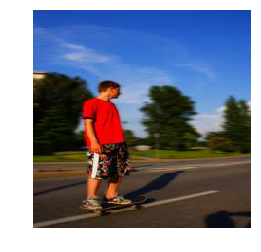

9508


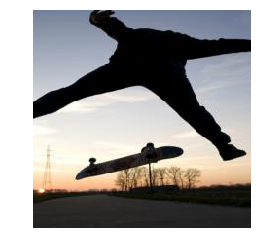

2269


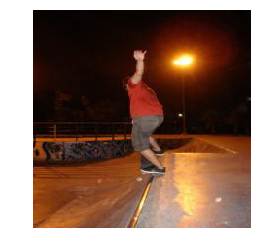

4240


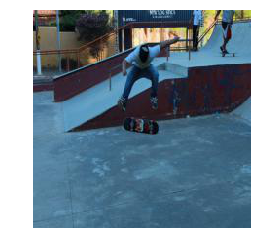

1121


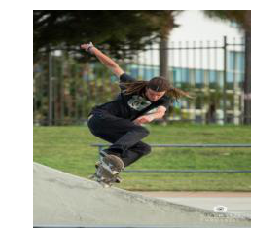

5402


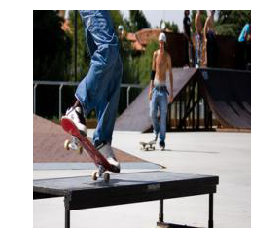

9910


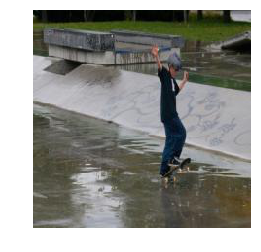

4847


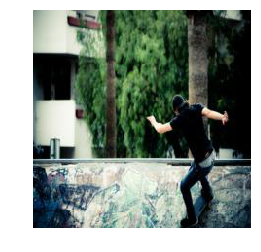

8207


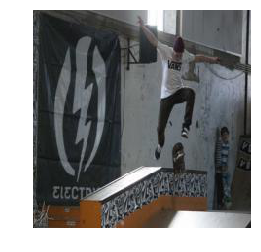

370


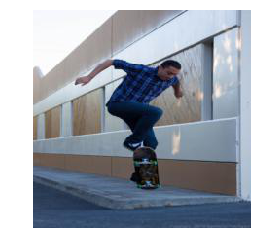

4193


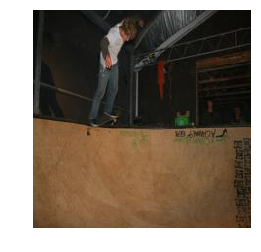

5570


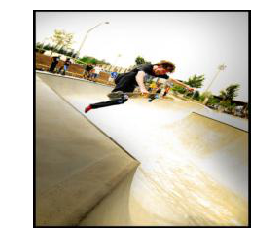

9012


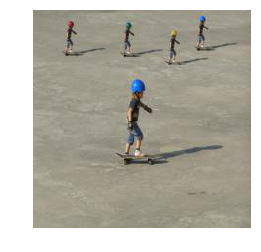

4169


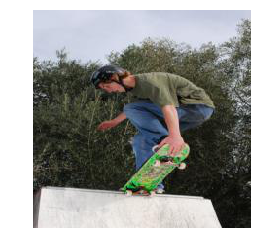

572


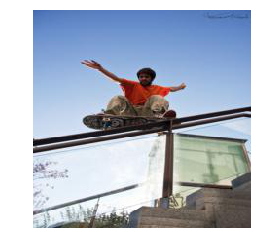

2338


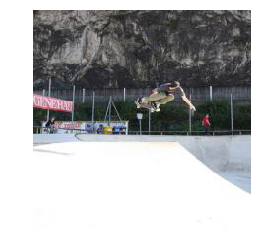

2016


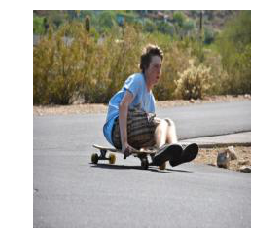

8248


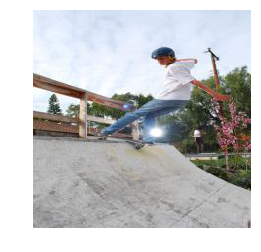

4902


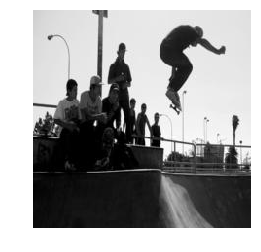

4912


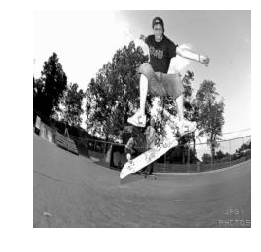

In [355]:
from PIL import Image
import matplotlib.pyplot as plt

print(train_data[0])
print()

for i in np.argsort(test[0])[::-1][0:20]:
    print(i)
    img = Image.open("./data/images_train/" + str(i) + ".jpg")
    img = np.asarray(img)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

('The skateboarder is putting on a show using the picnic table as his stage. A skateboarder pulling tricks on top of a picnic table. A man riding on a skateboard on top of a table. A skate boarder doing a trick on a picnic table. A person is riding a skateboard on a picnic table with a crowd watching.', 0)



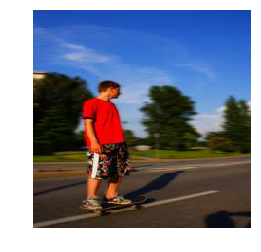

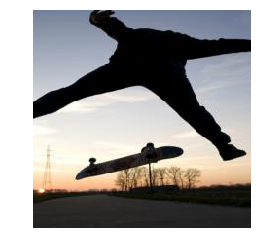

('A bowl of soup that has some carrots, shrimp, and noodles in it. The healthy food is in the bowl and ready to eat. Soup has carrots and shrimp in it as it sits next to chopsticks. A tasty bowl of ramen is served for someone to enjoy. Bowl of Asian noodle soup, with shrimp and carrots.', 1)



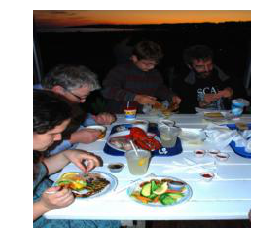

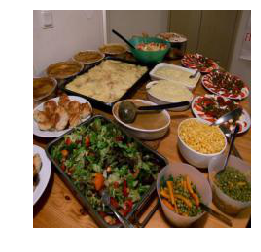

('A man who is walking across the street. A busy intersection with an ice cream truck driving by. a man walks behind an ice cream truck A man is crossing a street near an icecream truck. The man is walking behind the concession bus.', 2)



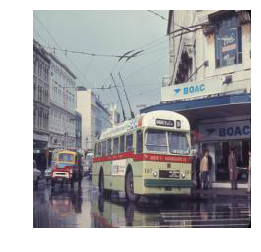

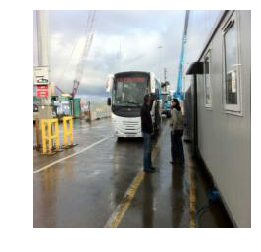

('A young boy throwing a frisbee in a grassy field a young boy in the park throwing a frisbee A young boy throws a frisbee in a tree lined park. A kid in a city park throws a bright green Frisbee. A boy throwing a green frisbee in a grass field.', 3)



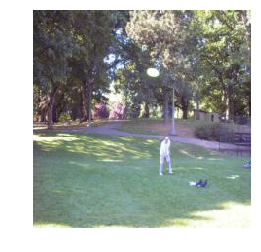

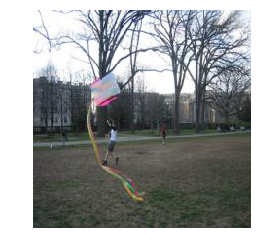

('A young child in the yard holding up a bat. A boy raring back with a baseball bat in a yard. A little boy has a baseball bat in a yard. A boy in black clothes holds a baseball bat over his shoulder near a fence and a tree. a little boy playing in his yard with a baseball bat', 4)



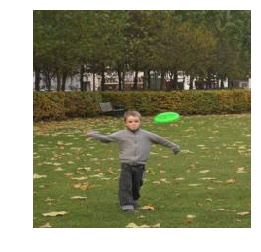

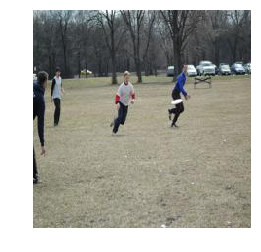

('A small bedroom with a desk and computer in it. A bedroom that has a desk, chair, and bed in it. A chair sitting in front of a brown desk. A desk beside a window in a bedroom a bed and a desk and chair by a big window', 5)



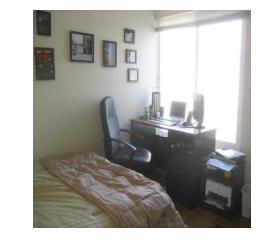

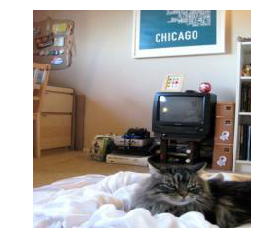

('A small child is eating a donut fed by another hand. A blonde boy looking at his donut hole. A boy is looking at a small doughnut with powdered sugar on his face. A little boy eating powered sugar covered flood. a child eats part of a sugar frosted donut', 6)



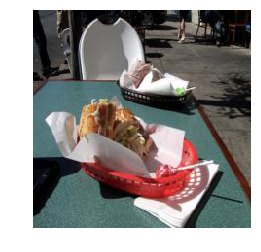

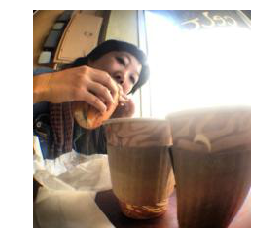

('a man is standing in the woods wearing a hat and glasses A man in sunglasses wears a grass tie and hat. A man wearing a woven crown and tie. a man in a blue shirt with some weird crown a man that is standing around in a hate', 7)



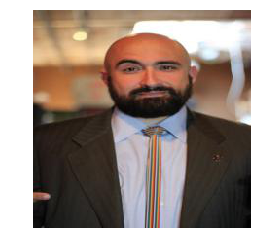

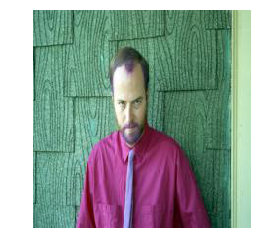

('this is a street with a brick building a building with a sign and a street right outside Black and white image of an empty street. a old building that is next to a street A black and white picture of a building', 8)



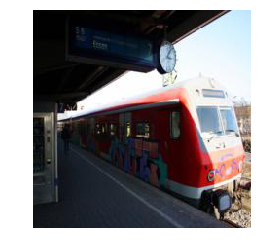

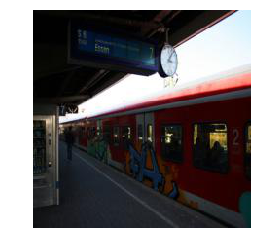

('A tent in a forest next to a silver and brown RV. a camp site and a trailer on the road Two pictures of a tent and a bus. Two juxtaposed pictures show a tent and a motor home. There is a tent with a photo of a bus under it.', 9)



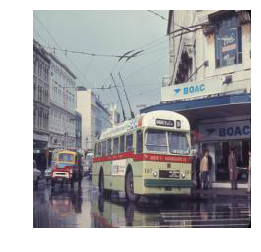

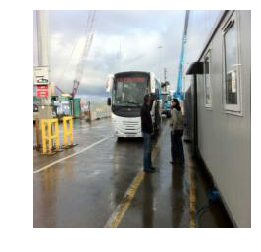

('A bunch of luggage laying on an area rug. Several pieces of luggage on a floor with an area rug. The luggage is sitting on top of the persian rug. a bunch of travel bags sit on a carpet floor Several pieces of luggage that are laying on the floor.', 10)



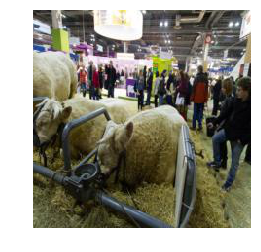

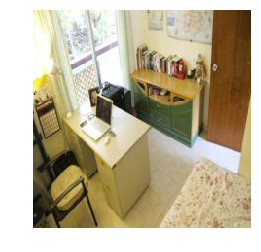

('A baseball player holding a bat next to a base. A photo of a baseball game where a guy is at home plate taking a pitch. A baseball player attempts to hit a baseball, while a catcher and umpire watch. people on a field playing baseball and other watching A baseball player holding a bat and a catcher squatting behind him.', 11)



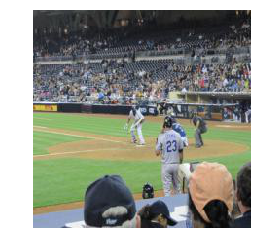

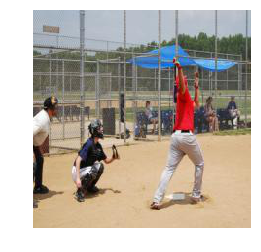

('A group of four street signs stacked on top of each other. four sign streets set on a blue background there are 4 traffic sigs of the United Kingdom A road sign giving directions to four streets The old street signs are on display.', 12)



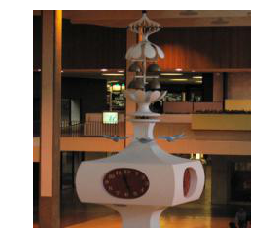

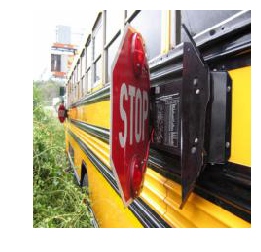

('A Boston Red Sox player up to bat. The stands are filled with people as an umpire stands behind a catcher and a man with a black helmet holds a bat. A baseball batter looking down the first base line in front of a crowd. A group of men on a field playing baseball. a crowd of people watching men play a baseball game', 13)



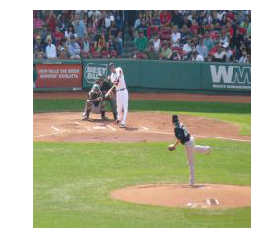

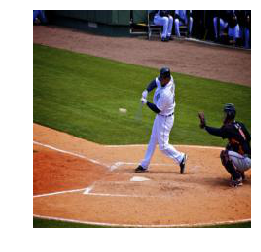

('A car driving through a tunnel under buildings Car passing through a very small tunnel in a city street. A car driving through a tunnel between two buildings. A tunnel in the middle of a street with a car about to go down it A car is driving through a tunnel in a city street.', 14)



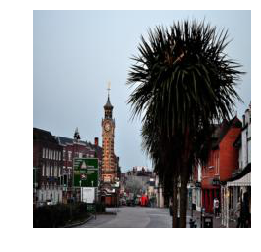

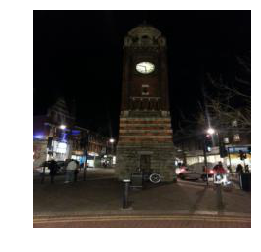

('Several people are standing at a table looking at wine bottles. A woman standing in front of a table surrounded by a crowd of people. A group of people at a table filled with wine bottles Eager people standing in front of tables at an exhibition. several people looking at many bottles of wine', 15)



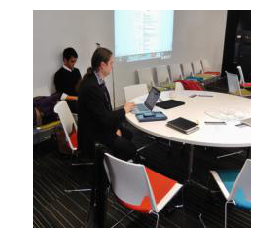

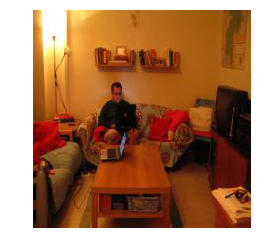

('a very tall brown structure sitting above a parking lot. A red brick school building with a student walking towards the building. A pair of buildings from a very far away view. People with backpacks walking around big brown buildings that look like college. A cluster of school buildings rise tall in the foreground as students walk to school.', 16)



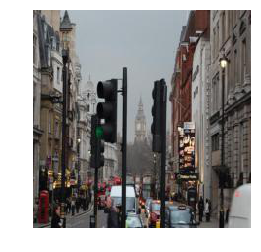

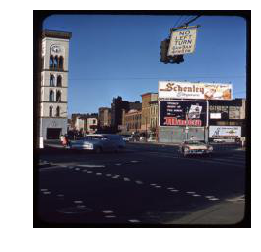

("The image shows a series of a snowboarder's descent down the slope. A photograph of several images of the same young man ridding a snowboard through the woods. A time lapse image of a snowboarder gliding forward Six people are snow boarding down the hill. A bunch of different images of a man on a snowboard.", 17)



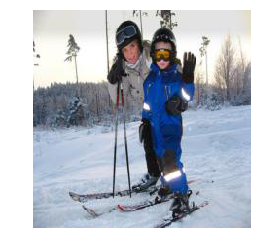

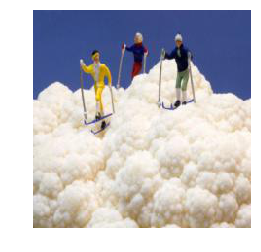

('A group of kids at table around a cake. A group of kids around a table with a cake. A group of kids watching a woman light a candle. A group of young children standing around a cake. little kids sitting around a table that has a birthday cake on it', 18)



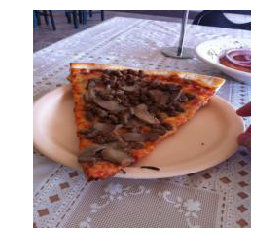

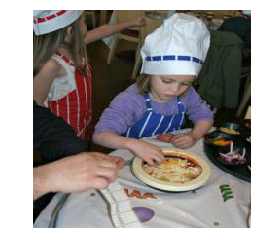

('A yellow and white train traveling past a train station. A small train going down the train track. A single train car stopped at a small station. A large long train on a steel track. Single commuter train car at a rail station.', 19)



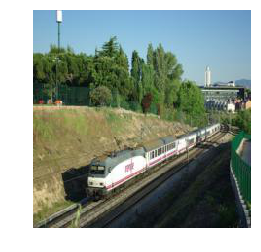

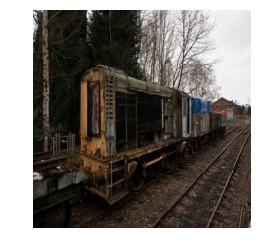

In [356]:
for i in (range(20)):
    print(train_data[i])
    print()
    for j in np.argsort(test[i])[::-1][0:2]:
        img = Image.open("./data/images_train/" + str(j) + ".jpg")
        img = np.asarray(img)
        plt.imshow(img)
        plt.axis('off')
        plt.show()